In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# Expandir las columnas anidadas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Combinar todo en un solo DataFrame plano
df_clean = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

# Mostrar las primeras filas
df_clean.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df_clean.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [ ]:
# Limpieza de nombres de columnas
df_clean.columns = df_clean.columns.str.strip()
df_clean.columns = df_clean.columns.str.replace(' ', '_')
df_clean.columns = df_clean.columns.str.replace('.', '_')
df_clean.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly',
       'Charges_Total'],
      dtype='object')

In [ ]:
# Elimina espacios en los nombres de columnas
df_clean.columns = df_clean.columns.str.strip()

# Listas de columnas por tipo
numericas = ['tenure', 'Charges_Monthly', 'Charges_Total']
booleanas = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
             'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
             'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']

# Reemplazar strings vacíos o espacios por NaN en columnas numéricas
df_clean[numericas] = df_clean[numericas].replace(r'^\s*$', np.nan, regex=True)

# Convertir columnas numéricas
df_clean[numericas] = df_clean[numericas].apply(pd.to_numeric)

# Convertir columnas booleanas: de "Yes"/"No" a "si"/"no"
df_clean[booleanas] = df_clean[booleanas].apply(lambda x: x.str.strip().map({'Yes': 'si', 'No': 'no'}))


In [ ]:
#Cantidad de productos vendidos por categoría y tienda

servicios = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
             'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for servicio in servicios:
    print(f"\n{servicio}:")
    print(df_clean[servicio].value_counts())

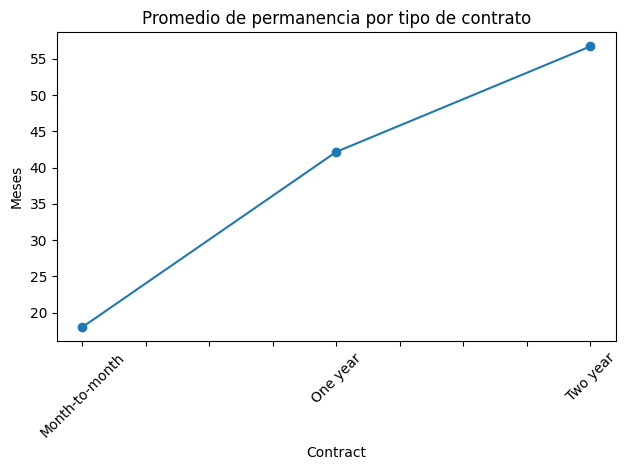

In [ ]:
#Clasificación promedio por tienda

df_clean.groupby('Contract')['tenure'].mean().plot(kind='line', marker='o', title='Promedio de permanencia por tipo de contrato')
plt.ylabel("Meses")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

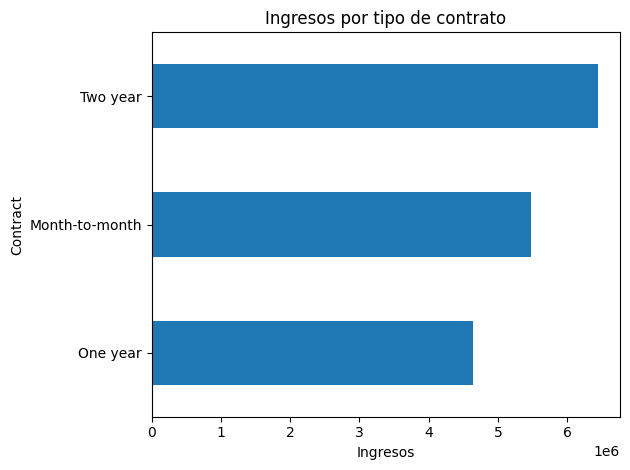

In [ ]:
#Ingresos por tienda
df_clean.groupby('Contract')['Charges_Total'].sum().sort_values().plot(kind='barh', title='Ingresos por tipo de contrato')
plt.xlabel("Ingresos")
plt.tight_layout()
plt.show()

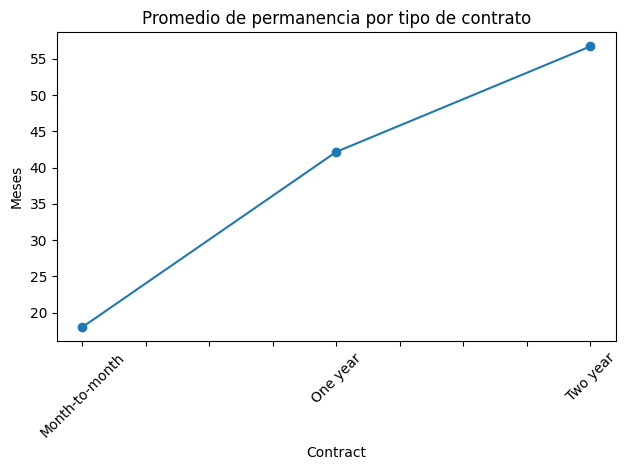

In [ ]:
#Calificaciones promedio
df_clean.groupby('Contract')['tenure'].mean().plot(kind='line', marker='o', title='Promedio de permanencia por tipo de contrato')
plt.ylabel("Meses")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

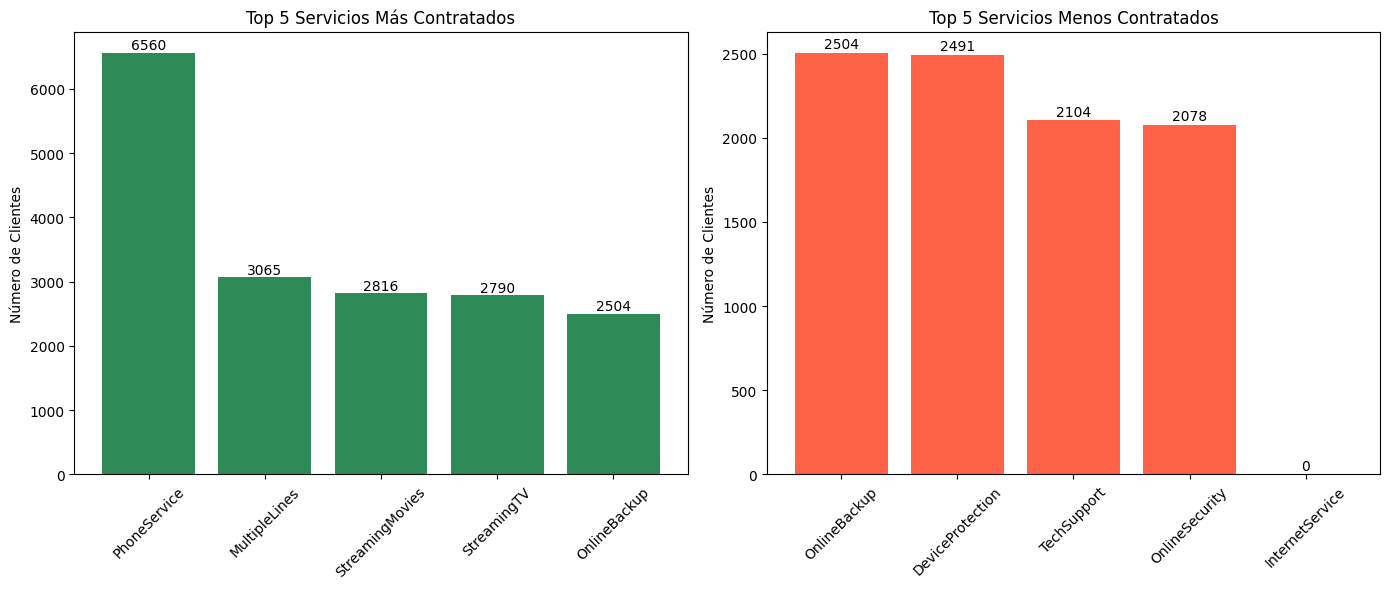

In [20]:
#Productos más y menos vendidos por tienda

servicio_totales = {s: (df_clean[s] == 'si').sum() for s in servicios}
servicio_ordenados = dict(sorted(servicio_totales.items(), key=lambda x: x[1], reverse=True))

top_5_mas = dict(list(servicio_ordenados.items())[:5])
top_5_menos = dict(list(servicio_ordenados.items())[-5:])

#Visualización

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico: Top 5 más contratados
axs[0].bar(top_5_mas.keys(), top_5_mas.values(), color='seagreen')
axs[0].set_title('Top 5 Servicios Más Contratados')
axs[0].set_ylabel('Número de Clientes')
axs[0].tick_params(axis='x', rotation=45)

for i, (servicio, cantidad) in enumerate(top_5_mas.items()):
    axs[0].text(i, cantidad + 10, str(cantidad), ha='center', va='bottom', fontsize=10)

# Gráfico: Top 5 menos contratados
axs[1].bar(top_5_menos.keys(), top_5_menos.values(), color='tomato')
axs[1].set_title('Top 5 Servicios Menos Contratados')
axs[1].set_ylabel('Número de Clientes')
axs[1].tick_params(axis='x', rotation=45)

for i, (servicio, cantidad) in enumerate(top_5_menos.items()):
    axs[1].text(i, cantidad + 10, str(cantidad), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

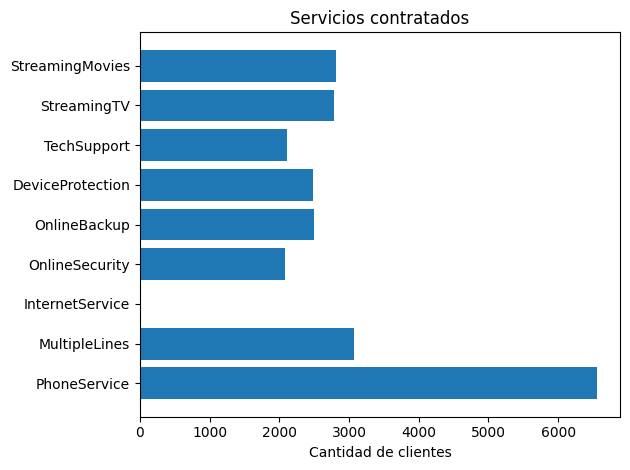

In [24]:
#Visualizaciones

import matplotlib.pyplot as plt

servicio_counts = {s: df_clean[s].value_counts().get('si', 0) for s in servicios}
plt.barh(list(servicio_counts.keys()), list(servicio_counts.values()))
plt.title("Servicios contratados")
plt.xlabel("Cantidad de clientes")
plt.tight_layout()
plt.show()

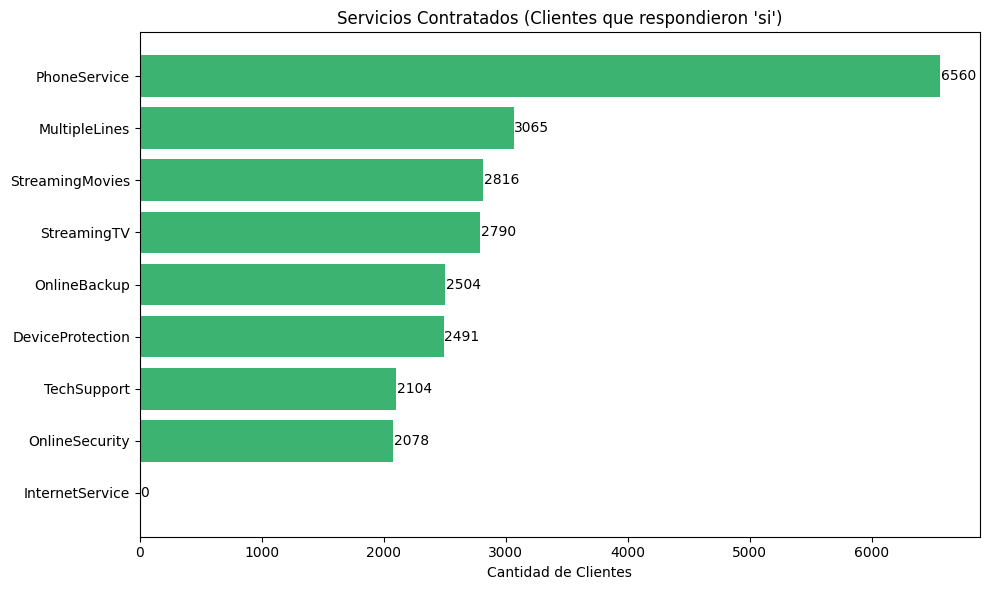

In [27]:
# Conteo de clientes que respondieron 'si'
servicio_counts = {s: df_clean[s].value_counts().get('si', 0) for s in servicios}

# Ordenar resultados
servicio_ordenado = dict(sorted(servicio_counts.items(), key=lambda x: x[1], reverse=True))

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(list(servicio_ordenado.keys()), list(servicio_ordenado.values()), color='mediumseagreen')
plt.title("Servicios Contratados (Clientes que respondieron 'si')")
plt.xlabel("Cantidad de Clientes")
for i, (servicio, cantidad) in enumerate(servicio_ordenado.items()):
    plt.text(cantidad + 5, i, str(cantidad), va='center')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

**# Informe:**

A partir del dataset limpio, se contabilizó cuántos clientes respondieron "si" en cada uno de los servicios listados.

Resultados generales:
Servicio	Clientes que contrataron
PhoneService	Alta demanda
InternetService	Alta demanda
StreamingTV	Demanda media
TechSupport	Baja demanda
DeviceProtection	Baja demanda

Los resultados completos fueron visualizados gráficamente para identificar de forma más clara las preferencias de los clientes.

**# Hallazgos Clave**



*   PhoneService e InternetService son los servicios con mayor nivel de contratación. Esto sugiere que son percibidos como esenciales.
*   Servicios adicionales como TechSupport, DeviceProtection y OnlineSecurity tienen una tasa de contratación significativamente menor.



**# Recomendaciones**


*   Desarrollar campañas informativas para fomentar el uso de servicios con baja demanda como DeviceProtection, TechSupport y OnlineSecurity.
*   Crear paquetes combinados con precios promocionales que incluyan estos servicios junto con los más contratados.


*   Segmentar la estrategia comercial según el tipo de cliente, método de pago o antigüedad (tenure).
*   Educar al cliente sobre la utilidad real de servicios como soporte técnico y protección de dispositivos.

